In [1]:
import uproot4 as upr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import particle
import ROOT as r
import math
import numpy as np

Welcome to JupyROOT 6.20/00


In [17]:
def InteractionVolume_short(target):
    if("C3H6Target" in target):
        return "C3H6_Target"
    elif("CTarget" in target):
        return "C_Target"
    else:
        return "Other"

In [2]:
tree = upr.open("production_antinumucc/events-in-SANDtracker.0.to.100.event_selection.root")

In [3]:
tree['digit_extended'].keys()

['FileName',
 'EventId',
 'EventType',
 'CCQEonHydrogen',
 'NofEvents',
 'Interaction_vtxX',
 'Interaction_vtxY',
 'Interaction_vtxZ',
 'Interaction_vtxT',
 'InteractionVolume',
 'NofFinalStateChargedParticles',
 'FinalStateLeptonEmissionAngle',
 'PrimaryStateHadronicSystemTotalKinE',
 'PrimaryStateHadronicSystemTopology_name',
 'InteractionTarget',
 'PrimariesPDG',
 'PrimariesTrackId',
 'PrimariesP4',
 'PrimariesFirstHitECAL',
 'PrimariesEDepECAL',
 'PrimariesEmissionAngle',
 'PrimaryHasNoECALHit',
 'PrimaryHasChangedDirection',
 'ExpectedNeutrinoP4FromMuon',
 'ExpectedHadronSystP3',
 'ExpectedHadronSystEnergy',
 'ExpectedNeutronArrivalPositionECAL',
 'ExpectedNeutronTOF',
 'ExpectedFiredModuleByNeutron',
 'MissingTransverseMomentum',
 'NofEventFiredModules',
 'EventFiredModules',
 'Fired_Cells_mod',
 'Fired_Cells_id',
 'Fired_Cells_x',
 'Fired_Cells_y',
 'Fired_Cells_z',
 'Fired_Cells_tdc1',
 'Fired_Cells_tdc2',
 'who_produced_tdc1',
 'who_produced_tdc2',
 'isCellComplete',
 'Cell_Re

In [6]:
primaries = tree['digit_extended'].arrays(['FileName',
 'EventId',
 'EventType',
 'CCQEonHydrogen',
 'Interaction_vtxX',
 'Interaction_vtxY',
 'Interaction_vtxZ',
 'Interaction_vtxT',
 'InteractionVolume',
 'PrimariesPDG',
 'PrimariesTrackId',
 'PrimariesP4',
 'PrimariesFirstHitECAL',
 'PrimariesEDepECAL',
 'PrimariesEmissionAngle',
 'PrimaryHasNoECALHit',
 'PrimaryHasChangedDirection',
 ],library='pd')

new_columns = {
    ('EventType','','')                           : 'EventType',
    ('FileName','','')                            : 'FileName',
    ('EventId','','')                             : 'EventId',
    ('CCQEonHydrogen','','')                      : 'CCQEonHydrogen',
    ('PrimaryStateHadronicSystemTotalKinE','','') : 'PrimaryStateHadronicSystemTotalKinE',
    ('PrimariesPDG','','')                        : 'PDG',
    ('PrimariesTrackId','','')                    : 'TrackId',
    ('Interaction_vtxX','','')                    : 'Interaction_vtxX',
    ('Interaction_vtxY','','')                    : 'Interaction_vtxY',
    ('Interaction_vtxZ','','')                    : 'Interaction_vtxZ',
    ('Interaction_vtxT','','')                    : 'Interaction_vtxT',
    ('InteractionVolume','','')                   : 'InteractionVolume',
    ('PrimariesP4','fP','fX')                     : 'Px',
    ('PrimariesP4','fP','fY')                     : 'Py',
    ('PrimariesP4','fP','fZ')                     : 'Pz',
    ('PrimariesP4','fE','')                       : 'E',
    ('PrimariesFirstHitECAL', 'fP', 'fX')         : 'PrimariesFirstHitECAL_x',
    ('PrimariesFirstHitECAL', 'fP', 'fY')         : 'PrimariesFirstHitECAL_y',
    ('PrimariesFirstHitECAL', 'fP', 'fZ')         : 'PrimariesFirstHitECAL_z',
    ('PrimariesFirstHitECAL', 'fE', '')           : 'PrimariesFirstHitECAL_t',
    ('PrimariesEDepECAL', '', '')                 : 'PrimariesEDepECAL',
    ('PrimariesEmissionAngle', '', '')            : 'PrimariesEmissionAngle',
    ('PrimaryHasChangedDirection', '', '')        : 'HasChangedDirection',
    ('PrimaryHasNoECALHit', '', '')               : 'HasNoECALHit',
}

primaries = primaries.rename(columns=new_columns)
primaries = primaries.set_index(['FileName','EventId'])

primaries

EventType  \
FileName                                           EventId             
events-in-SANDtracker.0.gtrac.root:gRooTracker:3   3             QES   
                                                   3             QES   
events-in-SANDtracker.0.gtrac.root:gRooTracker:15  15            RES   
                                                   15            RES   
                                                   15            RES   
...                                                              ...   
events-in-SANDtracker.94.gtrac.root:gRooTracker... 765           RES   
events-in-SANDtracker.94.gtrac.root:gRooTracker... 778           RES   
                                                   778           RES   
                                                   778           RES   
                                                   778           RES   

                                                            CCQEonHydrogen  \
FileName                                           EventId                   
events-in-SANDtracker.0.gtrac.root:gRooTracker:3   3                     0   
                                                   3                     0   
events-in-SANDtracker.0.gtrac.root:gRooTracker:15  15                    0   
                                                   15                    0   
                                                   15                    0   
...                                                                    ...   
events-in-SANDtracker.94.gtrac.root:gRooTracker... 765                   0   
events-in-SANDtracker.94.gtrac.root:gRooTracker... 778                   0   
                                                   778                   0   
                                                   778                   0   
                                                   778                   0   

                                                            Interaction_vtxX  \
FileName                                           EventId                     
events-in-SANDtracker.0.gtrac.root:gRooTracker:3   3                0.820999   
                                                   3                0.820999   
events-in-SANDtracker.0.gtrac.root:gRooTracker:15  15              -1.013635   
                                                   15              -1.013635   
                                                   15              -1.013635   
...                                                                      ...   
events-in-SANDtracker.94.gtrac.root:gRooTracker... 765              0.682574   
events-in-SANDtracker.94.gtrac.root:gRooTracker... 778              0.538097   
                                                   778              0.538097   
                                                   778              0.538097   
                                                   778              0.538097   

                                                            Interaction_vtxY  \
FileName                                           EventId                     
events-in-SANDtracker.0.gtrac.root:gRooTracker:3   3               -3.544753   
                                                   3               -3.544753   
events-in-SANDtracker.0.gtrac.root:gRooTracker:15  15              -2.847853   
                                                   15              -2.847853   
                                                   15              -2.847853   
...                                                                      ...   
events-in-SANDtracker.94.gtrac.root:gRooTracker... 765             -1.370458   
events-in-SANDtracker.94.gtrac.root:gRooTracker... 778             -2.597694   
                                                   778             -2.597694   
                                                   778             -2.597694   
                                                   778             -2.597694   

                         

In [19]:
selected_signal = tree['digit_extended'].arrays(['FileName',
 'EventId',
 'EventType',
 'CCQEonHydrogen',
  'Interaction_vtxX',
 'Interaction_vtxY',
 'Interaction_vtxZ',
 'InteractionTarget',
 'InteractionVolume',
 'PrimaryStateHadronicSystemTopology_name',
 'NofFinalStateChargedParticles',
#  'FinalStateLeptonEmissionAngle',
 'PrimaryStateHadronicSystemTotalKinE',
 'MissingTransverseMomentum',
 'ExpectedHadronSystP3',
#  'ExpectedHadronSystEnergy',
 'ExpectedNeutronArrivalPositionECAL',
 'ExpectedFiredModuleByNeutron',
 ],library='pd')

new_columns = {
    ('EventType','','')                              : 'EventType',
    ('FileName','','')                               : 'FileName',
    ('EventId','','')                                : 'EventId',
    ('CCQEonHydrogen','','')                         : 'CCQEonHydrogen',
    ('InteractionTarget','','')                      : 'InteractionTarget',
    ('PrimaryStateHadronicSystemTotalKinE','','')    : 'PrimaryStateHadronicSystemTotalKinE',
    ('MissingTransverseMomentum', '', '')            : 'MissingTransverseMomentum',
    ('PrimariesPDG','','')                           : 'PrimariesPDG',
    ('NofFinalStateChargedParticles','','')          : 'NofFinalStateChargedParticles',
    ('Interaction_vtxX', '', '')                     : 'Interaction_vtxX',
    ('Interaction_vtxY', '', '')                     : 'Interaction_vtxY',
    ('Interaction_vtxZ', '', '')                     : 'Interaction_vtxZ',
    # NEUTRON PREDICTIONS
    ('ExpectedHadronSystP3fX', '', '')               : 'ExpectedHadronSystPx',
    ('ExpectedHadronSystP3fY', '', '')               : 'ExpectedHadronSystPy',
    ('ExpectedHadronSystP3fZ', '', '')               : 'ExpectedHadronSystPz',
    ('ExpectedNeutronArrivalPositionECALfX', '', '') : 'ExpectedNeutronArrivalPositionECALfX',
    ('ExpectedNeutronArrivalPositionECALfY', '', '') : 'ExpectedNeutronArrivalPositionECALfY',
    ('ExpectedNeutronArrivalPositionECALfZ', '', '') : 'ExpectedNeutronArrivalPositionECALfZ',
    ('ExpectedFiredModuleByNeutron', '', '')         : 'ExpectedFiredModuleByNeutron',
}


# Rename the columns
selected_signal = selected_signal.rename(columns=new_columns)

selected_signal = selected_signal.set_index(['FileName','EventId'])

selected_signal["InteractionVolume_short"] = selected_signal.apply(lambda row: InteractionVolume_short(row['InteractionVolume']), axis=1)

Text(204.0, 0.5, 'Interaction Target')

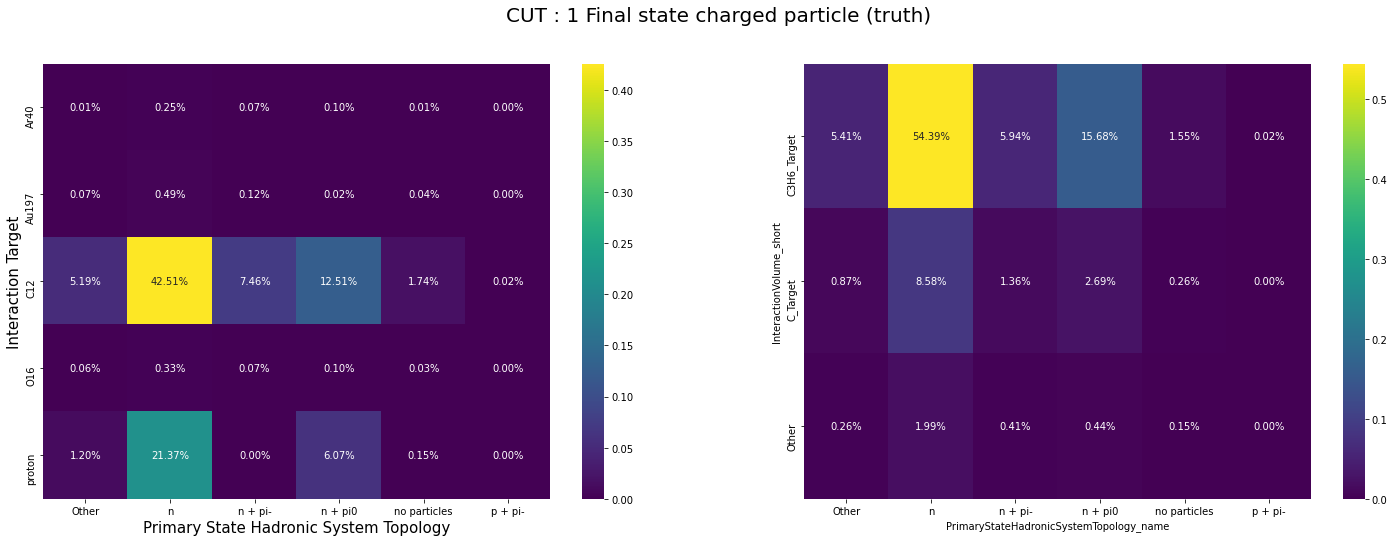

In [20]:
fig, ax = plt.subplots(1,2, figsize=(25, 8))

pivot_table_1cp = selected_signal.pivot_table(
    index='InteractionTarget',
    columns='PrimaryStateHadronicSystemTopology_name',
    values='NofFinalStateChargedParticles',
    aggfunc='count',
    fill_value=0
)

pivot_table_1cp_ = selected_signal.pivot_table(
    index='InteractionVolume_short',
    columns='PrimaryStateHadronicSystemTopology_name',
    values='NofFinalStateChargedParticles',
    aggfunc='count',
    fill_value=0
)

sns.heatmap(pivot_table_1cp/len(selected_signal), annot=True, fmt=".2%", cmap="viridis", ax=ax[0])

sns.heatmap(pivot_table_1cp_/len(selected_signal), annot=True, fmt=".2%", cmap="viridis", ax=ax[1])

plt.suptitle('CUT : 1 Final state charged particle (truth)', fontsize=20)
ax[0].set_xlabel('Primary State Hadronic System Topology', fontsize=15)
ax[0].set_ylabel('Interaction Target', fontsize=15)

In [15]:
fired_cells = tree['digit_extended'].arrays(['FileName',
 'CCQEonHydrogen',
 'EventId',
 'Fired_Cells_mod',
 'Fired_Cells_id',
 'Fired_Cells_x',
 'Fired_Cells_y',
 'Fired_Cells_z',
 'isCellComplete',
 'Fired_Cells_tdc1',
#  'who_produced_tdc1',
 'Fired_Cells_tdc2',
#  'who_produced_tdc2',
 'Cell_Reconstructed_hits',
 'ExpectedNeutronHit',
 ], library='pd')


new_columns = {
    ('FileName','','')                               : 'FileName',
    ('EventId','','')                                : 'EventId',
    ('CCQEonHydrogen','','')                         : 'CCQEonHydrogen',
    ('Fired_Cells_mod','','')                        : 'Fired_Cells_mod',
    ('Fired_Cells_id','','')                         : 'Fired_Cells_id',
    ('Fired_Cells_x','','')                          : 'Fired_Cells_x',
    ('Fired_Cells_y','','')                          : 'Fired_Cells_y',
    ('Fired_Cells_z','','')                          : 'Fired_Cells_z',
    ('isCellComplete','','')                         : 'isCellComplete',
    ('Fired_Cells_tdc1','','')                       : 'Fired_Cells_tdc1',
    ('who_produced_tdc1','','')                      : 'who_produced_tdc1',
    ('Fired_Cells_tdc2','','')                       : 'Fired_Cells_tdc2',
    ('who_produced_tdc2','','')                      : 'who_produced_tdc2',
    ('Cell_Reconstructed_hits', 'fP', 'fX')          : 'hit_reco_x',
    ('Cell_Reconstructed_hits', 'fP', 'fY')          : 'hit_reco_y',
    ('Cell_Reconstructed_hits', 'fP', 'fZ')          : 'hit_reco_z',
    ('Cell_Reconstructed_hits', 'fE', '')            : 'hit_reco_t',
    ('ExpectedNeutronHit', 'fP', 'fX')               : 'ExpectedNeutronHit_x',
    ('ExpectedNeutronHit', 'fP', 'fY')               : 'ExpectedNeutronHit_y',
    ('ExpectedNeutronHit', 'fP', 'fZ')               : 'ExpectedNeutronHit_z',
    ('ExpectedNeutronHit', 'fE', '')                 : 'ExpectedNeutronHit_t',
}

fired_cells = fired_cells.rename(columns=new_columns)

fired_cells = fired_cells.set_index(['FileName','EventId'])

fired_cells

CCQEonHydrogen  \
FileName                                           EventId                   
events-in-SANDtracker.0.gtrac.root:gRooTracker:3   3                     0   
                                                   3                     0   
                                                   3                     0   
                                                   3                     0   
                                                   3                     0   
...                                                                    ...   
events-in-SANDtracker.94.gtrac.root:gRooTracker... 778                   0   
                                                   778                   0   
                                                   778                   0   
                                                   778                   0   
                                                   778                   0   

                                                            Fired_Cells_mod  \
FileName                                           EventId                    
events-in-SANDtracker.0.gtrac.root:gRooTracker:3   3                     14   
                                                   3                     14   
                                                   3                     14   
                                                   3                     14   
                                                   3                     14   
...                                                                     ...   
events-in-SANDtracker.94.gtrac.root:gRooTracker... 778                   23   
                                                   778                   23   
                                                   778                   23   
                                                   778                   23   
                                                   778                   23   

                                                            Fired_Cells_id  \
FileName                                           EventId                   
events-in-SANDtracker.0.gtrac.root:gRooTracker:3   3                214003   
                                                   3                214004   
                                                   3                214104   
                                                   3                214105   
                                                   3                214106   
...                                                                    ...   
events-in-SANDtracker.94.gtrac.root:gRooTracker... 778              223309   
                                                   778              223310   
                                                   778              223407   
                                                   778              223408   
                                                   778              223409   

                                                            Fired_Cells_x  \
FileName                                           EventId                  
events-in-SANDtracker.0.gtrac.root:gRooTracker:3   3        -4.067066e-13   
                                                   3        -4.067066e-13   
                                                   3        -4.067066e-13   
                                                   3        -4.067066e-13   
                                                   3        -4.067066e-13   
...                                                                   ...   
events-in-SANDtracker.94.gtrac.root:gRooTracker... 778       4.536223e-13   
                                                   778       4.536223e-13   
                                                   778       4.536223e-13   
                                                   778       4.536223e-13   
                                                   778       4.536223e-13   

